## import libraries

In [188]:
import warnings
warnings.filterwarnings('ignore')

# DATA MANIPULATION
import pandas as pd
import numpy as np
import math

# DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Interaction
from ipywidgets import widgets, interact

### First view to the Data

In [189]:
# Getting the raw data and take a copy of it to work with it with out touching the original dataset.
raw_data = pd.read_csv(r"train.csv")
data = raw_data.copy()
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [190]:
# Dropping the ("Id") column as we will not use it any way.
data.drop(columns="Id",inplace = True)

In [191]:
# Getting the test dataset that we will test the final model with it.
submission = pd.read_csv(r"test.csv")
submission.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.34,Ideal,G,VVS2,61.1,57.0,4.52,4.48,2.75
1,2,0.71,Premium,E,VS2,62.7,58.0,5.74,5.68,3.58
2,3,0.44,Very Good,I,VS1,62.8,56.0,4.83,4.88,3.05
3,4,0.81,Premium,E,SI2,60.1,59.0,6.09,6.03,3.65
4,5,0.40,Ideal,G,VVS1,61.2,56.0,4.74,4.80,2.92


In [192]:
print("There are {} observations and {} features in this dataset. \n".format(data.shape[0],data.shape[1]))

There are 43152 observations and 10 features in this dataset. 



In [193]:
# Getting the info of the data to see each column data type and to look if there is any null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [194]:
# Showing the main charactaristics of each column in the dataset
@interact(column = data.columns)
def column_info(column):
    print("*" * 10, column, "*" * 10)
    display(data[column].value_counts())
    print("-" * 30)
    display(data[column].describe())
    print("=" * 40)

interactive(children=(Dropdown(description='column', options=('carat', 'cut', 'color', 'clarity', 'depth', 'ta…

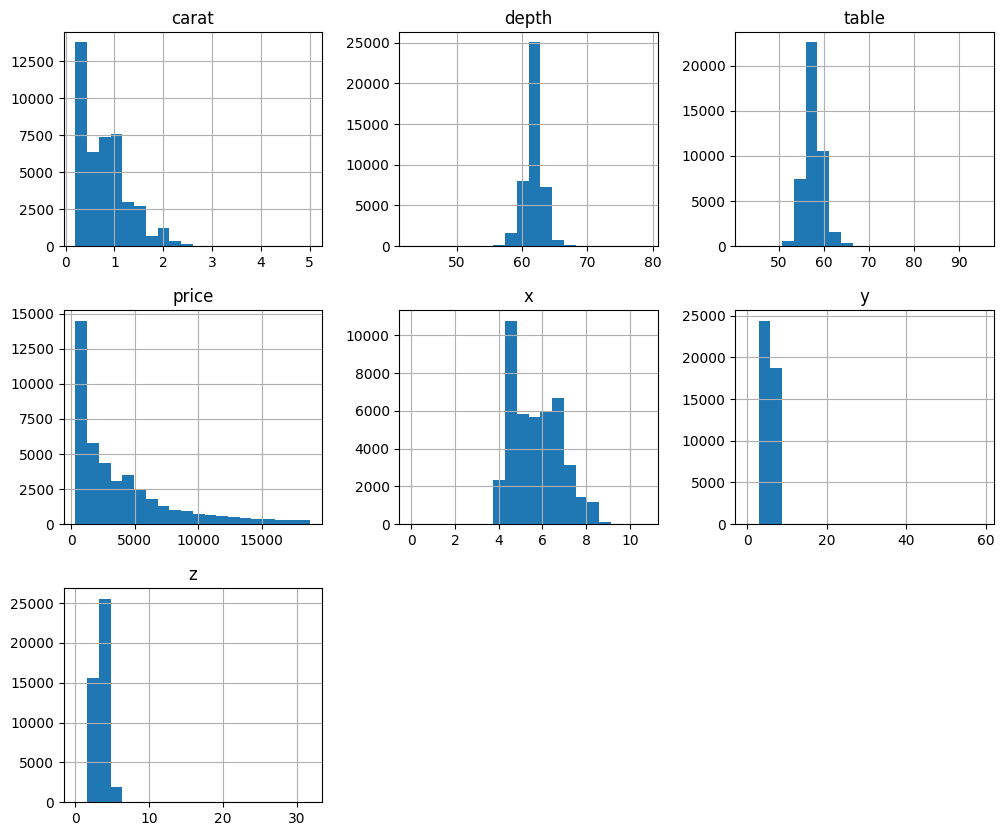

In [195]:
data.hist(bins=20,figsize=(12,10))
plt.show()

## Data Splitting

In [196]:
# dividing data into homogeneous subgroups via stratified sampling
data['carat_cat'] = pd.cut(data['carat'],bins = [0, 0.5, 1, 1.5, 2, np.inf],labels = [1, 2, 3, 4, 5])
print(data['carat_cat'].value_counts()/len(data))

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2,random_state=42,stratify=data['carat_cat'])

data.drop('carat_cat', axis = 1, inplace = True)
train_set.drop('carat_cat', axis = 1, inplace = True)
test_set.drop('carat_cat', axis = 1, inplace = True)

carat_cat
1    0.350760
2    0.324156
3    0.223976
4    0.066254
5    0.034854
Name: count, dtype: float64


# **Data Preprocessing**

### **Data Cleaning**

In [197]:
# Checking the Duplicates.
print("Number of Duplicated in the train data:",train_set.duplicated().sum())
print("Number of Duplicated in the test or test data:",test_set.duplicated().sum())
# remove duplicates
train_set.drop_duplicates(inplace=True)
test_set.drop_duplicates(inplace=True)

Number of Duplicated in the train data: 71
Number of Duplicated in the test or test data: 5


In [198]:
# Checking the Null Values.
print("Number of Missing Values In The Train Set:\n",train_set.isna().sum())
print("Number of Missing Values In The test Set:\n",test_set.isna().sum())
print("Number of Missing Values In The Submission Set:\n",submission.isna().sum())

Number of Missing Values In The Train Set:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Number of Missing Values In The test Set:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
Number of Missing Values In The Submission Set:
 Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64


In [199]:
# Getting how many ("0") value in the ("x","y","z").
num_of_zeros = len(train_set[np.logical_or(np.logical_or(train_set['x'] == 0, train_set['y'] == 0), train_set['z'] == 0)])
num_of_zeros_in_test = len(test_set[np.logical_or(np.logical_or(test_set['x'] == 0, test_set['y'] == 0), test_set['z'] == 0)])
num_of_zeros_sub = len(submission[np.logical_or(np.logical_or(submission['x'] == 0, submission['y'] == 0), submission['z'] == 0)])

print('The number of zeros in the train set is : ',num_of_zeros)
print('The number of zeros in the test set is : ',num_of_zeros_in_test)
print('The number of zeros in the submission set is : ',num_of_zeros_sub)

# remove the zeros from the data
train_set = train_set[(train_set['x'] != 0) & (train_set['y'] != 0) & (train_set['z'] != 0)]
test_set = test_set[(test_set['x'] != 0) & (test_set['y'] != 0) & (test_set['z'] != 0)]

# We cann't remove data from submission set for that we will replace the zeros from the submission with anthor values
submission = submission.replace(0, method='ffill')
# print((submission == 0).sum())

The number of zeros in the train set is :  13
The number of zeros in the test set is :  4
The number of zeros in the submission set is :  3


***Observations:***

1.   There are some duplicates in the data, we dropped them.
2.   There is no Nulls.
2.   There are ("0") in ("X"&"y"&"z") columns we removed them.


## Feature Encoding

In [200]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cut_category_encoding = [['Fair','Good','Very Good','Premium','Ideal']]
color_category_encoding = [['J','I','H','G','F','E','D']]
clarity_category_encoding = [['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']]

cut_pipeling = Pipeline([('cut_encoder',OrdinalEncoder(categories=cut_category_encoding))])
color_pipeling = Pipeline([('color_encoder',OrdinalEncoder(categories=color_category_encoding))])
clarity_pipeling = Pipeline([('clarity_encoder',OrdinalEncoder(categories=clarity_category_encoding))])

cat = ['cut','color','clarity']

categories_encoding = ColumnTransformer([
    ('cut_pip',cut_pipeling, [cat[0]]),
    ('color_pip',color_pipeling, [cat[1]]),
    ('clarity_pip',clarity_pipeling, [cat[2]])
])

In [201]:
train_set[cat] = categories_encoding.fit_transform(train_set)
test_set[cat] = categories_encoding.transform(test_set)
submission[cat] = categories_encoding.transform(submission)

## Check the outliers

In [202]:
# method for plot boxplots 
def boxplot(df):
    # Initialize figure with 10 subplots in a row
    fig, ax = plt.subplots(1, 10, figsize=(22, 6))

    # Add padding between the subplots
    plt.subplots_adjust(wspace=0.5)

    # Define the variables for each subplot
    variables = df.columns  # Assuming categorical_col contains the names of your categorical columns
    colors = ['brown', 'g', 'y', 'b', 'r', 'purple', 'orange', 'pink', 'cyan', 'magenta']
    x_labels = df.columns

    # Draw boxplots for each variable in its corresponding subplot
    for i, variable in enumerate(variables):
        sns.boxplot(data=df[variable], ax=ax[i], color=colors[i])
        ax[i].set_xlabel(x_labels[i])

        # Remove x-tick labels
        ax[i].set_xticklabels([])

    plt.show()

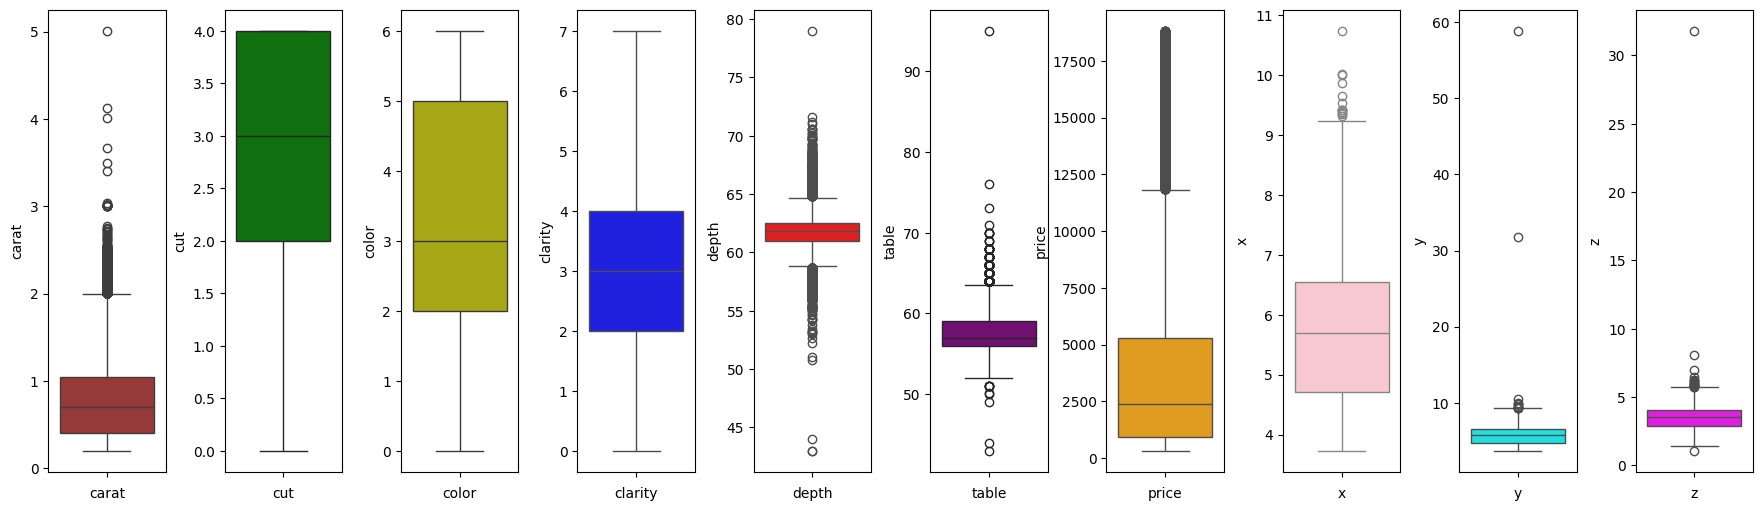

In [203]:
boxplot(train_set)

***Observations:***

3.   There is outliers in the ("Price") column.
4.   There is outliers in the ("X"&"y"&"z","table","depth","carat") columns.

For outliers we will first take the **logarithm(log)** for each column contain outliers and if the outliers not disappear we will use **IQR** to remove it and that's why we used it:

1.   it is not affected by extreme values, making it a robust measure of spread in the dataset.
2.   The IQR method identifies outliers as values that fall below 𝑄1−1.5×IQR or above 𝑄3+1.5×IQR. This rule is widely accepted for identifying outliers in a consistent and standardized way.
3.   straightforward. It involves basic statistical measures that are easy to understand and implement.
4. In summary, the IQR is a robust, effective, simple, and non-parametric method for identifying and handling outliers, ensuring a cleaner and more reliable dataset for analysis and modeling.  

In [204]:
# Take the logarithm for each column contain outlires
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.square)

train_set[['carat','depth','table','x','y','z']] = log_transformer.transform(train_set[['carat','depth','table','x','y','z']])
test_set[['carat','depth','table','x','y','z']] = log_transformer.transform(test_set[['carat','depth','table','x','y','z']])

submission[['carat','depth','table','x','y','z']] = log_transformer.transform(submission[['carat','depth','table','x','y','z']])

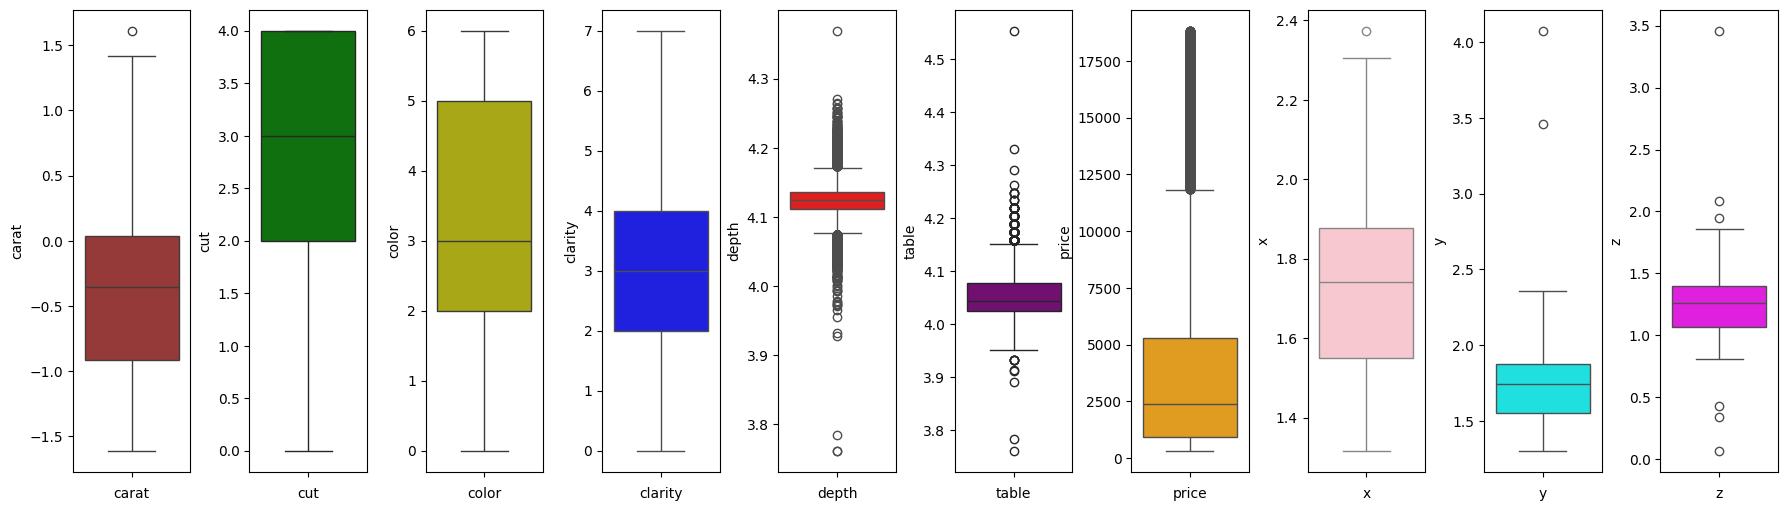

In [205]:
boxplot(train_set)

In [206]:
# We could notes that there are still some column contain ouliers
# Remove outliers from specified columns using the IQR method.
def remove_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to with some outliers
columns_with_outliers = ['carat','x','y','z']

# Remove outliers
train_set = remove_outliers_iqr(train_set, columns_with_outliers)
test_set = remove_outliers_iqr(train_set, columns_with_outliers)

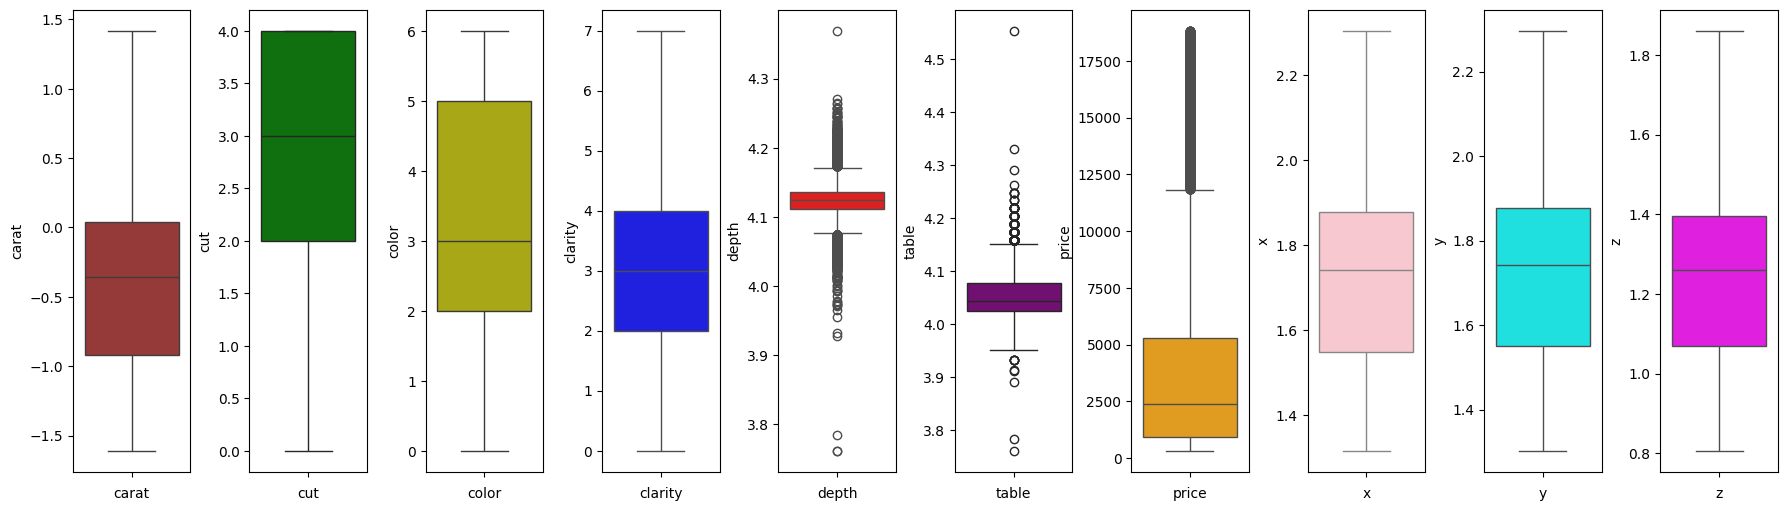

In [207]:
boxplot(train_set)

## **Feature Engineering**

## Feature Extraction
We will generate new features from the features that we have.
we can make a new columns from the depth & table & x & y & z columns to help the model train better.we will calculate table_percentage, depth_percentage for train and test.
We chose these two features because they have better correlation with price and doesn't contain outliers like in depth and table.

In [208]:
# for train data
train_set['average_dimensions'] = (train_set['x'] + train_set['y'] + train_set['z']) / 3
train_set['depth_percentage'] = (train_set['depth'] / train_set['average_dimensions']) * 100
train_set['table_percentage'] = (train_set['table'] / train_set['average_dimensions']) * 100
train_set.drop(['depth', 'table', 'average_dimensions'], axis=1, inplace=True)

# for test data
test_set['average_dimensions'] = (test_set['x'] + test_set['y'] + test_set['z']) / 3
test_set['depth_percentage'] = (test_set['depth'] / test_set['average_dimensions']) * 100
test_set['table_percentage'] = (test_set['table'] / test_set['average_dimensions']) * 100
test_set.drop(['depth', 'table', 'average_dimensions'], axis=1, inplace=True)

# for submission data
submission['average_dimensions'] = (submission['x'] + submission['y'] + submission['z']) / 3
submission['depth_percentage'] = (submission['depth'] / submission['average_dimensions']) * 100
submission['table_percentage'] = (submission['table'] / submission['average_dimensions']) * 100
submission.drop(['depth', 'table', 'average_dimensions'], axis=1, inplace=True)

# These are some features that we made (Volume and Surface area), but we are not sure that they are good for the model or not because the RMSE didn't change when we add them.
# train_set['volume']= train_set['x'] * train_set['y'] * train_set['z']
# train_set['surface_area'] =  2 * (train_set['x'] * train_set['y'] + train_set['x'] * train_set['z'] + train_set['y'] * train_set['z'])

# validation_set['volume']= validation_set['x'] * validation_set['y'] * validation_set['z']
# validation_set['surface_area'] =  2 * (validation_set['x'] * validation_set['y'] + validation_set['x'] * validation_set['z'] + validation_set['y'] * validation_set['z'])

# submission['surface_area'] =  2 * (submission['x'] * submission['y'] + submission['x'] * submission['z'] + submission['y'] * submission['z'])
# submission["volume"] = submission["x"] * submission["y"] * submission["z"]

### See the correlation between the features.

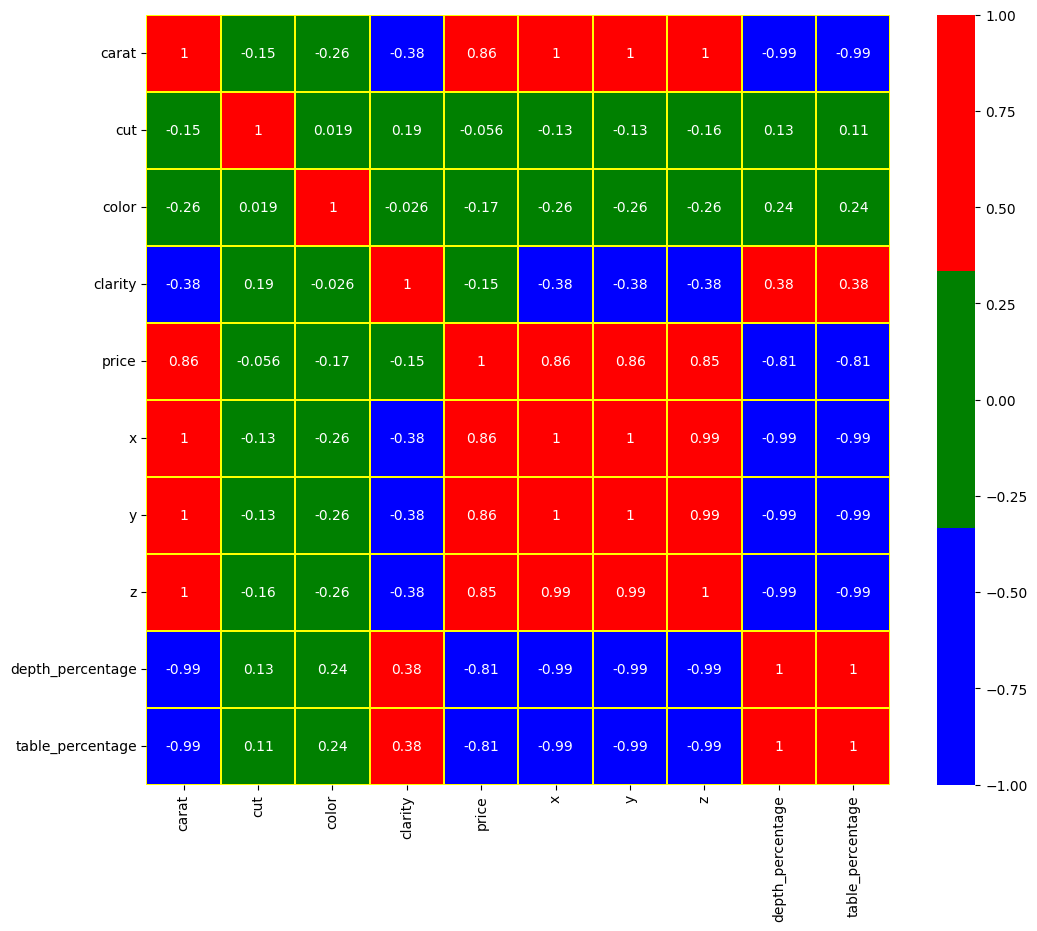

In [209]:
corr_matrix = train_set.select_dtypes(np.number).corr()
corr_matrix
plt.figure(figsize=(12,10))
sns.heatmap(data=corr_matrix,cbar=True,annot=True,cmap=['blue','green','red'],linecolor='yellow',linewidths=0.01,vmin=-1)
plt.show()

In [210]:
# Present the first 5 rows of the train cleaned data.
train_set.head()

,carat,cut,color,clarity,price,x,y,z,depth_percentage,table_percentage
36931,-0.967584,1.0,4.0,3.0,719,1.543298,1.549688,1.040277,297.537251,298.374974
37031,-0.634878,4.0,4.0,5.0,2290,1.652497,1.646734,1.175573,276.907409,267.429612
37781,-1.139434,1.0,4.0,2.0,528,1.477049,1.481605,0.996949,312.518447,310.648792
16499,-0.430783,4.0,0.0,2.0,1214,1.722767,1.726332,1.244155,263.709647,254.982046
27772,-1.171183,3.0,6.0,2.0,732,1.470176,1.460938,0.982078,316.029755,312.599321


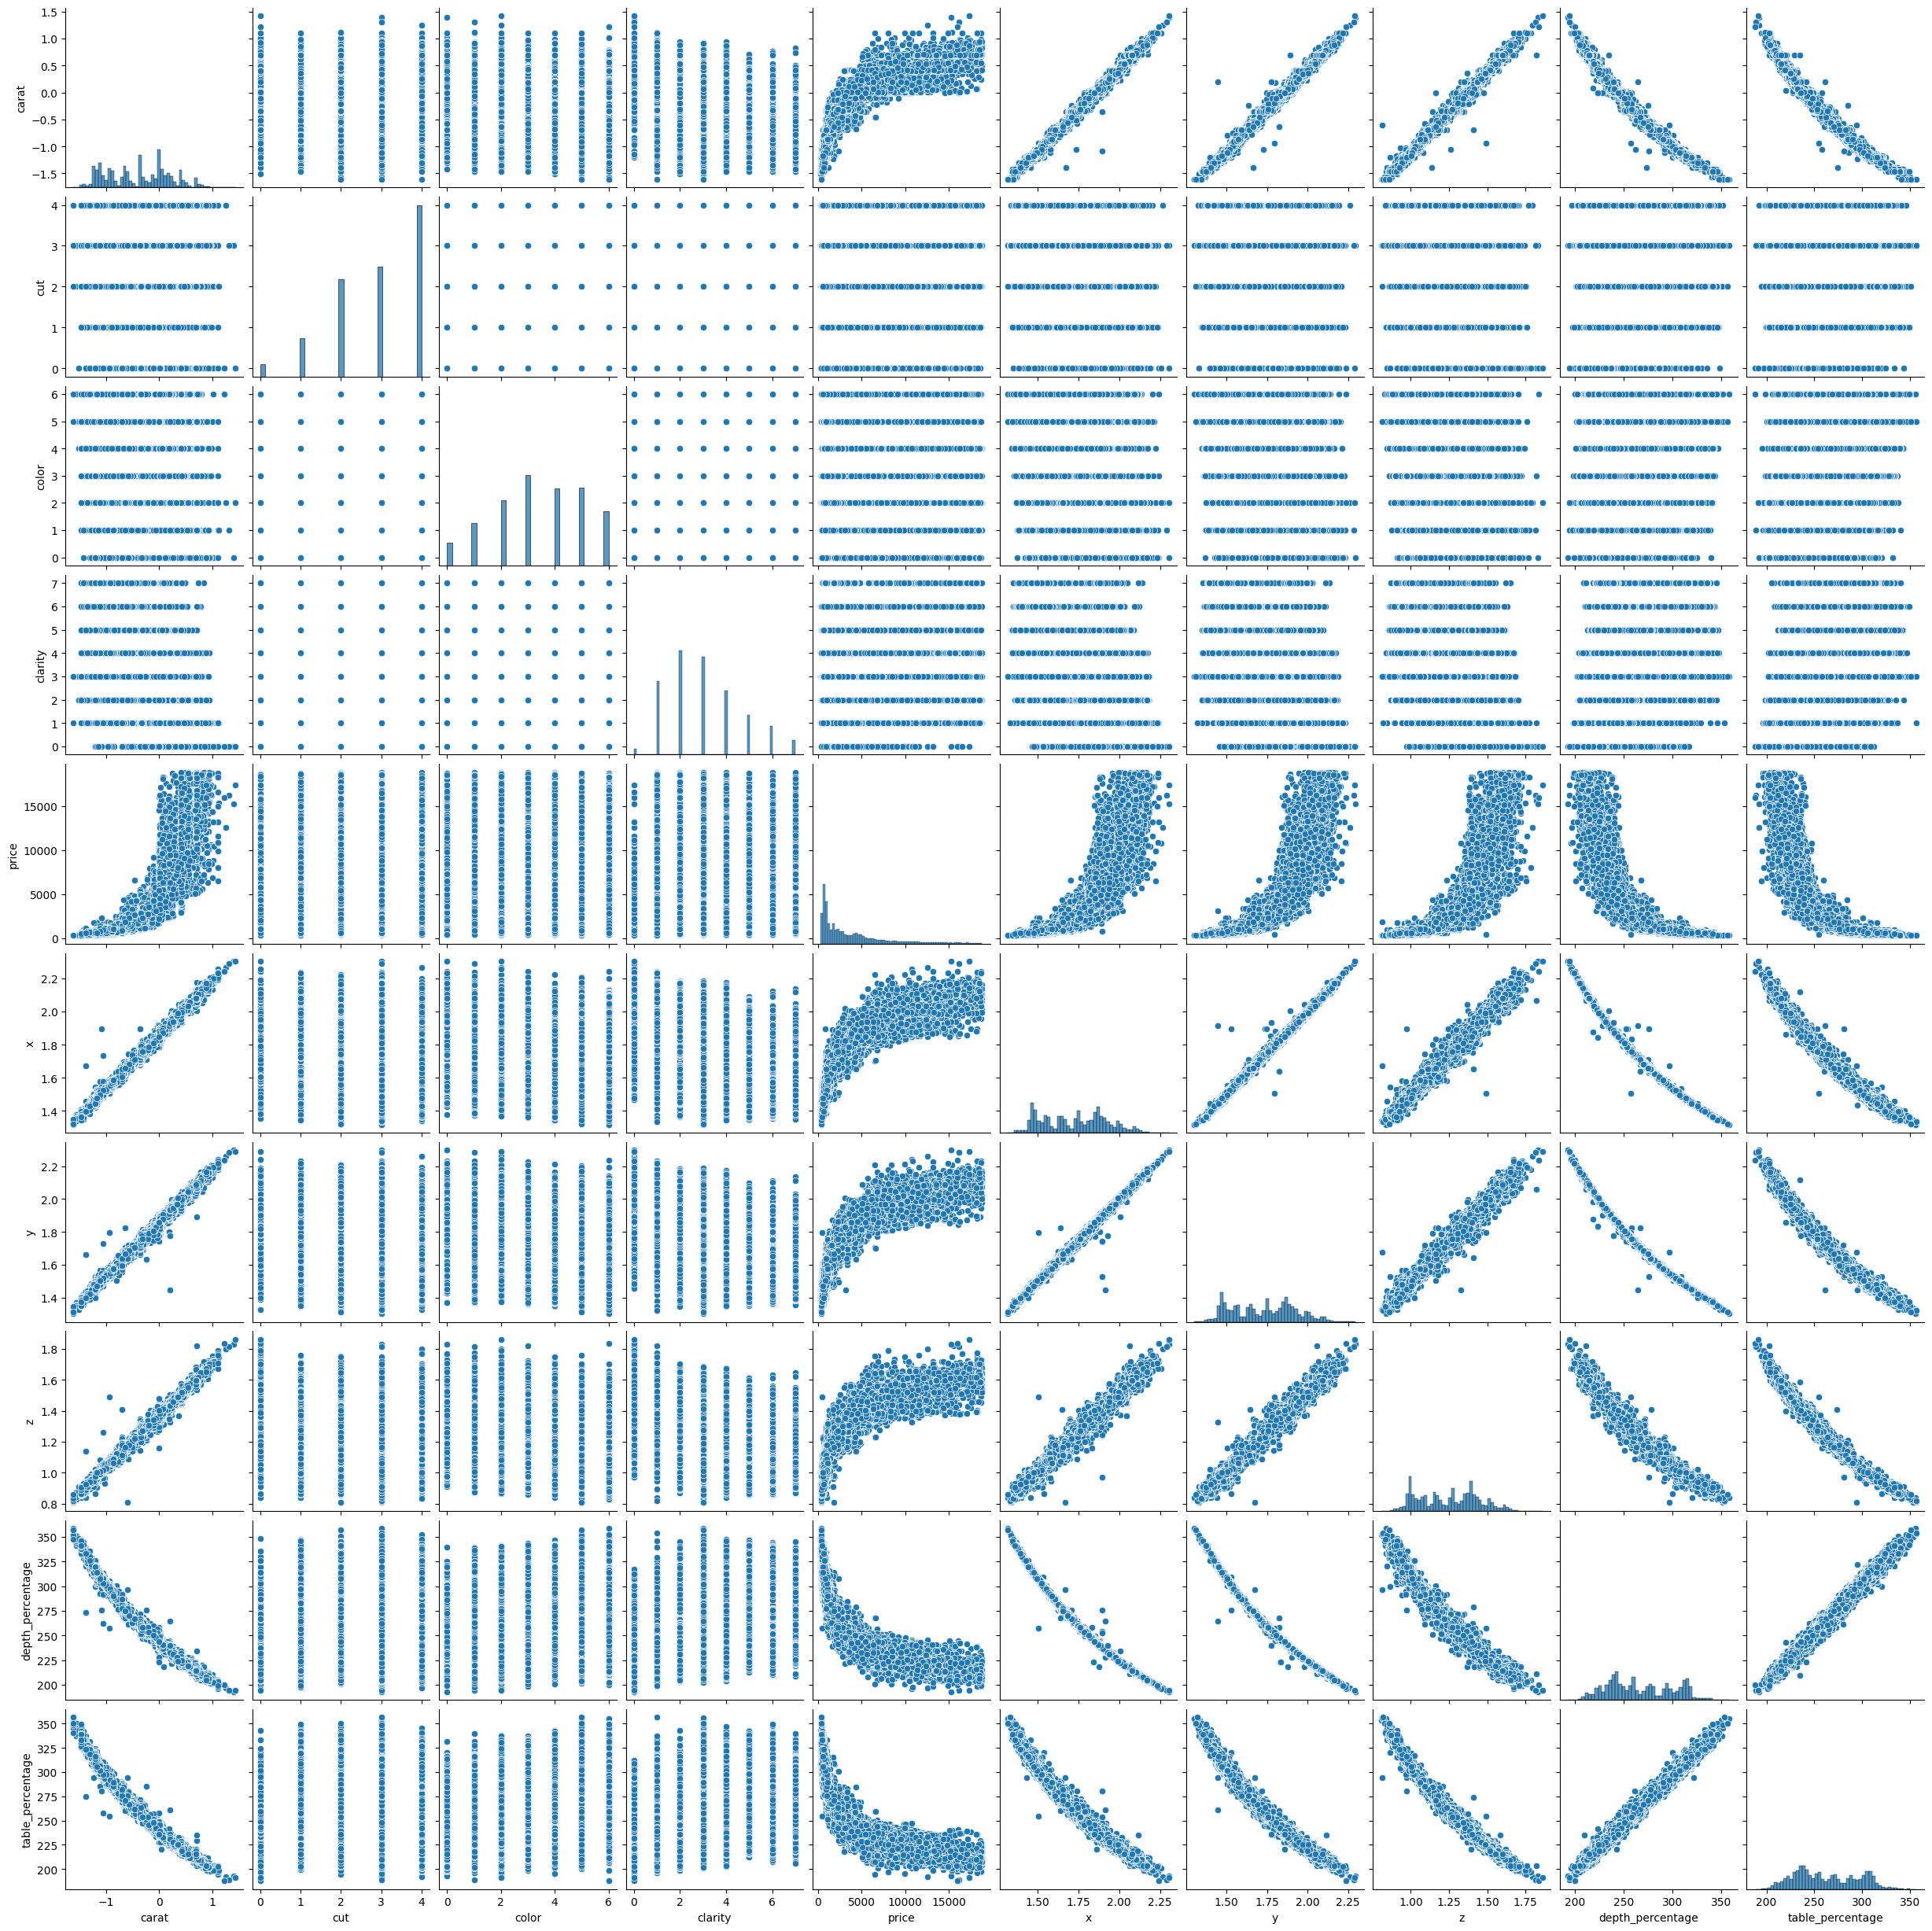

In [211]:
sns.pairplot(data=train_set)
plt.show()

In [212]:
# spliting the input and output for train and test sets
# train set
X_train = train_set.drop(columns=['price'],axis=1)
y_train = train_set[['price']]
# test set
X_test = test_set.drop(columns=['price'],axis=1)
y_test = test_set[['price']]

## Data Scaling

In [213]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# train set scaling
x_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(x_train_scaled, columns=X_train.columns,index=X_train.index)

# validation set scaling
x_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(x_test_scaled, columns=X_test.columns,index=X_test.index)

## Custom Transformer

In [214]:
from sklearn.base import BaseEstimator, TransformerMixin

class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
        self.scal = StandardScaler()
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        temp = np.log(X)
        return self.scal.fit_transform(temp)
    
    def inverse_transform(self, X, y=None):
        temp = self.scal.inverse_transform(X)
        return np.exp(temp)

## **Cross-Validation**

we imported and defined various regression models from scikit-learn (LinearRegression, DecisionTreeRegressor, RandomForestRegressor, SVR, GradientBoostingRegressor) and xgboost. Additionally, we import the TransformedTargetRegressor for transforming the target variable and cross_val_score for cross-validation.         
                                                    
We evaluated each model using Cross-Validation, for each model, we calculated the root mean squared error using 10-fold cross-validation.

After evaluating all models, we select the model with the lowest mean RMSE as the best model.
The best models were two models, RandomForestRegressor and xgboost.

The results : 

- Linear Regression: Mean RMSE = 974.7001651662849, Std RMSE = 59.155334333056395
- Decision Tree Regressor: Mean RMSE = 745.557287786586, Std RMSE = 33.52876621658884
- Random Forest: Mean RMSE = 553.9547955818464, Std RMSE = 22.645760628069326
- SVR: Mean RMSE = 576.2282107871152, Std RMSE = 23.586621542701852
- Gradient Boosting Regressor: Mean RMSE = 611.9919555266512, Std RMSE = 26.47860930771184
- xgb: Mean RMSE = 548.4448301692626, Std RMSE = 16.29553586465159

This process allows for the comparison of multiple regression models and selection of the best-performing one based on RMSE through cross-validation.

In [215]:
# Take about 15 minutes to finish 
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.model_selection import cross_val_score

# Define models to evaluate
models = [
    ('Linear Regression', TransformedTargetRegressor(regressor=LinearRegression(),transformer=LogTransformer())),
    ('Decision Tree Regressor',TransformedTargetRegressor(regressor=DecisionTreeRegressor(random_state=42),transformer=LogTransformer())),
    ('Random Forest', TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),transformer=LogTransformer())),
    ('SVR',TransformedTargetRegressor(regressor=SVR(kernel='rbf'),transformer=LogTransformer())),
    ('Gradient Boosting Regressor',TransformedTargetRegressor(regressor=GradientBoostingRegressor(),transformer=LogTransformer())),
    ('xgb',TransformedTargetRegressor(regressor=xgb.XGBRegressor(),transformer=LogTransformer()))
]

# Evaluate each model using cross-validation
for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    scores = np.sqrt(-scores)
    print(f'{name}: Mean RMSE = {scores.mean()}, Std RMSE = {scores.std()}')

Linear Regression: Mean RMSE = 974.7001651662849, Std RMSE = 59.155334333056395
Decision Tree Regressor: Mean RMSE = 745.557287786586, Std RMSE = 33.52876621658884
Random Forest: Mean RMSE = 553.9547955818464, Std RMSE = 22.645760628069326
SVR: Mean RMSE = 576.2282107871152, Std RMSE = 23.586621542701852
Gradient Boosting Regressor: Mean RMSE = 611.9919555266512, Std RMSE = 26.47860930771184
xgb: Mean RMSE = 548.4448301692626, Std RMSE = 16.29553586465159


## Fitting and Evaluating on train set

After chosen the models, we fit the selected models (XGBoost and Random Forest) to the training data and calculates the Root Mean Squared Error (RMSE) on the training set for each model.        
- RMSE for Random Forest on test set about : 206                                      
- RMSE for XGBoost on test set about : 437

In [216]:
from sklearn.metrics import mean_squared_error

xgb_reg = TransformedTargetRegressor(xgb.XGBRegressor(),transformer=LogTransformer())
# xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(X_train,y_train)
xgb_predictions = xgb_reg.predict(X_test)
xgb_rmse = mean_squared_error(y_test,xgb_predictions)**0.5
print('The Loss(RMSE) On The test set for xgboost is :',xgb_rmse)

The Loss(RMSE) On The test set for xgboost is : 437.49586598199795


In [217]:
forest_reg = TransformedTargetRegressor(RandomForestRegressor(),transformer=LogTransformer())
# forest_reg = RandomForestRegressor()

forest_reg.fit(X_train,y_train)
forest_predictions = forest_reg.predict(X_test)
fores_rmse = mean_squared_error(y_test,forest_predictions)**0.5
print('The Loss(RMSE) On The test set for random forest is :',fores_rmse)

The Loss(RMSE) On The test set for random forest is : 206.21028974012623


## **Fine - Tuning** 

We performed hyperparameter tuning for the Random Forest and XGBoost models using Randomized Search Cross-Validation (RandomizedSearchCV).

Randomized Search Cross-Validation is performed with n_iter=50, meaning it will try 50 random combinations of hyperparameters from the specified distributions.

The RMSE for Random Forest is : 549 with param {'n_estimators': 166, 'max_features':13}           
The RMSE for XGBoost is : 552 with param {'n_estimators': 108}


In [218]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'regressor__n_estimators': np.random.randint(100, 500, 20),   
    'regressor__max_depth': np.random.randint(3, 10, 20),        
    'regressor__learning_rate': np.random.uniform(0.01, 0.5, 20),  
    'regressor__subsample': np.random.uniform(0.5, 1, 20),          
    'regressor__colsample_bytree': np.random.uniform(0.5, 1, 20),   
    'regressor__gamma': np.random.uniform(0, 1, 20),             
    'regressor__min_child_weight': np.random.randint(1,10,20),     
}

xgb_rnd_search = RandomizedSearchCV(TransformedTargetRegressor(regressor=xgb.XGBRegressor(), transformer=LogTransformer())
    , param_distributions=param_dist,n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
xgb_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=TransformedTargetRegressor(regressor=XGBRegressor(base_score=None,
                                                                               booster=None,
                                                                               callbacks=None,
                                                                               colsample_bylevel=None,
                                                                               colsample_bynode=None,
                                                                               colsample_bytree=None,
                                                                               device=None,
                                                                               early_stopping_rounds=None,
                                                                               enable_categorical=False,
                                                                               eval_metric=None,
                                                                               feature_types=None,
                                                                               gamma=None,
                                                                               grow_policy=None,
                                                                               importance_type=None,
                                                                               intera...
                                        'regressor__n_estimators': array([210, 202, 204, 399, 473, 129, 465, 110, 325, 237, 254, 400, 155,
       166, 469, 299, 183, 138, 488, 235]),
                                        'regressor__subsample': array([0.94028194, 0.56669142, 0.72276591, 0.71258993, 0.55894236,
       0.78165586, 0.57417461, 0.74948835, 0.67075969, 0.5210877 ,
       0.86731563, 0.64632056, 0.7431376 , 0.55140121, 0.95133058,
       0.65812627, 0.75034098, 0.71814436, 0.91073698, 0.56675509])},
                   random_state=42, scoring='neg_mean_squared_error')

In [219]:
cvres = xgb_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

print('===================================================================')
print('The Best Params : ',xgb_rnd_search.best_params_)

print('===================================================================')
xgb_model = xgb_rnd_search.best_estimator_
xgb_predictions = xgb_model.predict(X_train)
xgb_rmse = mean_squared_error(y_train, xgb_predictions)**0.5
print('The Loss(RMSE) on The train set for xgboost is :',xgb_rmse)

605.4116452746755 {'regressor__subsample': 0.5667550911837465, 'regressor__n_estimators': 210, 'regressor__min_child_weight': 6, 'regressor__max_depth': 9, 'regressor__learning_rate': 0.43274779630799987, 'regressor__gamma': 0.2959215272125859, 'regressor__colsample_bytree': 0.790386641219966}
560.3815803314003 {'regressor__subsample': 0.9513305771324466, 'regressor__n_estimators': 210, 'regressor__min_child_weight': 9, 'regressor__max_depth': 8, 'regressor__learning_rate': 0.031420971931523364, 'regressor__gamma': 0.1931635638038497, 'regressor__colsample_bytree': 0.9649423046043298}
630.869500156932 {'regressor__subsample': 0.9107369781945014, 'regressor__n_estimators': 488, 'regressor__min_child_weight': 9, 'regressor__max_depth': 6, 'regressor__learning_rate': 0.4048986114971787, 'regressor__gamma': 0.8069663985832699, 'regressor__colsample_bytree': 0.5602039527602003}
665.7269917437196 {'regressor__subsample': 0.7494883496620379, 'regressor__n_estimators': 473, 'regressor__min_chi

In [220]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'regressor__n_estimators': np.random.randint(1, 200, 10),
        'regressor__max_features': np.random.randint(1, 16, 10),
}

forest_rnd_search = RandomizedSearchCV(TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42), transformer=LogTransformer()),
        param_distributions=param_distribs,n_iter=3, cv=5, scoring='neg_mean_squared_error', random_state=42)
forest_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                                        transformer=LogTransformer()),
                   n_iter=3,
                   param_distributions={'regressor__max_features': array([ 6, 15,  1, 11,  6,  8,  1,  7, 13,  1]),
                                        'regressor__n_estimators': array([190, 123,  33, 190, 133,  28, 170,  37, 182, 128])},
                   random_state=42, scoring='neg_mean_squared_error')

In [221]:
cvres = forest_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

print('===================================================================')
print('The Best Params : ',forest_rnd_search.best_params_)

print('===================================================================')
forest_model = forest_rnd_search.best_estimator_
forest_predictions = forest_model.predict(X_train)
forest_rmse = mean_squared_error(y_train, forest_predictions)**0.5
print('The Loss(RMSE) on The train set is :',forest_rmse)  


557.9663216688807 {'regressor__n_estimators': 190, 'regressor__max_features': 13}
557.7640340136968 {'regressor__n_estimators': 190, 'regressor__max_features': 8}
556.4256313898966 {'regressor__n_estimators': 190, 'regressor__max_features': 7}
The Best Params :  {'regressor__n_estimators': 190, 'regressor__max_features': 7}
The Loss(RMSE) on The train set is : 203.78184192970102


## **Evaluate the models on the test set**

We evaluated the two models using test set and got these results for each one :
- RMSE for Random Fores model is : 532                                                            
- RMSE for XGBoost model is : 535 

In [222]:
from sklearn.metrics import mean_squared_error

# XGBoost 
xgb_model = xgb_rnd_search.best_estimator_
xgb_predictions = xgb_model.predict(X_test)
x_final_rmse = mean_squared_error(y_test, xgb_predictions)**0.5
print('The Loss(RMSE) on test set (not submission set) for XGBoost : ',x_final_rmse)

The Loss(RMSE) on test set (not submission set) for XGBoost :  522.6221507360641


In [223]:
# Random Forest 
forest_model = forest_rnd_search.best_estimator_
forest_predictions = forest_model.predict(X_test)
f_final_rmse = mean_squared_error(y_test, forest_predictions)**0.5
print('The Loss(RMSE) on test set (not submission set) for Random forest: ',f_final_rmse)

The Loss(RMSE) on test set (not submission set) for Random forest:  203.78184192970102


### Train the selected model on the whole data set that available and Fine-tune the model again 
the results :
- Loss(RMSE): 200.3923721352888 {'n_estimators': 158, 'max_features': 10}

In [224]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50
...,...,...,...,...,...,...,...,...,...,...
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65


In [225]:
# remove duplicates and zeros
data.drop_duplicates(inplace=True)
data = data[(data['x'] != 0) & (data['y'] != 0) & (data['z'] != 0)]

# take the logarithm for the some columns in the data to remove outliers
data[['carat','depth','table','x','y','z']] = log_transformer.transform(data[['carat','depth','table','x','y','z']])
# remove outliers using IQR
data = remove_outliers_iqr(data, columns_with_outliers)

# extracting some features for the data like depth_percentage and table_percentage
data['average_dimensions'] = (data['x'] + data['y'] + data['z']) / 3
data['depth_percentage'] = (data['depth'] / data['average_dimensions']) * 100
data['table_percentage'] = (data['table'] / data['average_dimensions']) * 100
data.drop(['depth', 'table', 'average_dimensions'], axis=1, inplace=True)

# split the X_train and Y_train
X_data = data.drop('price',axis=1)
y_data = data['price']

# encoding the categorical data
X_data[cat] = categories_encoding.fit_transform(X_data)

# scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_data)
X_data = pd.DataFrame(x_scaled, columns=X_data.columns,index=X_data.index)

X_data.head()

,carat,cut,color,clarity,x,y,z,depth_percentage,table_percentage
0,0.776289,0.982401,-1.413966,-1.240852,0.802365,0.829030,0.818804,-0.846073,-0.869335
1,1.381833,0.085404,-0.238876,1.184847,1.402878,1.438304,1.348958,-1.310019,-1.283962
2,-1.273397,0.982401,0.348668,-0.028002,-1.233339,-1.268634,-1.281556,1.322954,1.297445
3,-0.409926,0.982401,-0.238876,-0.028002,-0.415501,-0.391356,-0.439375,0.288796,0.259320
4,0.066176,0.085404,-0.826421,1.184847,0.122738,0.084533,0.039589,-0.224485,-0.216780


In [226]:
# Take about 10 minutes to finish
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'regressor__n_estimators': np.random.randint(1, 200, 10),
        'regressor__max_features': np.random.randint(1, 16, 10),
}

forest_rnd_search = RandomizedSearchCV(TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42), transformer=LogTransformer()),
        param_distributions=param_distribs,n_iter=1, cv=5, scoring='neg_mean_squared_error', random_state=42)
forest_rnd_search.fit(X_data, y_data)


RandomizedSearchCV(cv=5,
                   estimator=TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42),
                                                        transformer=LogTransformer()),
                   n_iter=1,
                   param_distributions={'regressor__max_features': array([ 3,  9, 13, 10, 15,  6, 13,  4, 10,  6]),
                                        'regressor__n_estimators': array([129, 110,  12,  57,  45,  62, 130,  67, 121,  59])},
                   random_state=42, scoring='neg_mean_squared_error')

In [227]:
print('=========================================================')
cvres = forest_rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
print('=========================================================')
forest_rnd_search.best_params_

print('=========================================================')
final_model = forest_rnd_search.best_estimator_
final_predictions = final_model.predict(X_data)
final_rmse = mean_squared_error(y_data, final_predictions)**0.5
final_rmse
print('The loss(RMSE) on train data set : ',final_rmse)

554.6468051694613 {'regressor__n_estimators': 110, 'regressor__max_features': 6}
The loss(RMSE) on train data set :  205.79414824507992


### Finally, predict using the submission data set 
the results :
- RMSE : 531

In [228]:
submission

,Id,carat,cut,color,clarity,x,y,z,depth_percentage,table_percentage
0,1,-1.078810,4.0,3.0,5.0,1.508512,1.499623,1.011601,306.924030,301.740063
1,2,-0.342490,3.0,5.0,3.0,1.747459,1.736951,1.275363,260.833525,255.922465
2,3,-0.820981,2.0,1.0,4.0,1.574846,1.585145,1.115142,290.514106,282.472014
3,4,-0.210721,3.0,5.0,1.0,1.806648,1.796747,1.294727,250.872250,249.740853
4,5,-0.916291,4.0,3.0,6.0,1.556037,1.568616,1.071584,294.131207,287.782983
...,...,...,...,...,...,...,...,...,...,...
10783,10784,-0.562119,4.0,2.0,4.0,1.675226,1.678964,1.181727,271.779664,266.231846
10784,10785,0.048790,4.0,3.0,3.0,1.894617,1.884035,1.391282,238.354504,234.609474
10785,10786,-0.342490,4.0,5.0,6.0,1.736951,1.743969,1.266948,261.083190,253.208397
10786,10787,0.104360,3.0,5.0,1.0,1.899118,1.896119,1.403643,237.216871,236.263052


In [229]:
sub = submission[['Id']]
submission.drop('Id',axis=1,inplace=True)
temp_arr = scaler.transform(submission)
submission = pd.DataFrame(temp_arr, columns=submission.columns,index=submission.index)
submission

,carat,cut,color,clarity,x,y,z,depth_percentage,table_percentage
0,-1.169647,0.982401,-0.238876,1.184847,-1.129453,-1.186701,-1.205885,1.197720,1.219749
1,0.090451,0.085404,0.936213,-0.028002,0.104772,0.048023,0.156305,-0.192160,-0.202916
2,-0.728412,-0.811594,-1.413966,0.578422,-0.786818,-0.741763,-0.671153,0.702871,0.621464
3,0.315954,0.085404,0.936213,-1.240852,0.410498,0.359117,0.256311,-0.492547,-0.394859
4,-0.891521,0.982401,-0.238876,1.791272,-0.883973,-0.827759,-0.896106,0.811946,0.786373
...,...,...,...,...,...,...,...,...,...
10783,-0.285410,0.982401,-0.826421,0.578422,-0.268333,-0.253661,-0.327273,0.137925,0.117197
10784,0.760068,0.982401,-0.238876,-0.028002,0.864880,0.813241,0.754965,-0.870026,-0.864697
10785,0.090451,0.982401,0.936213,1.791272,0.050496,0.084533,0.112845,-0.184632,-0.287189
10786,0.855167,0.085404,0.936213,-1.240852,0.888130,0.876113,0.818804,-0.904331,-0.813353


In [230]:
final_predictions = final_model.predict(submission)

sub['price'] = final_predictions
sub    

,Id,price
0,1,888.557216
1,2,2951.671731
2,3,831.300946
3,4,2807.185867
4,5,1087.938929
...,...,...
10783,10784,1777.707455
10784,10785,6670.616464
10785,10786,4273.659385
10786,10787,4668.298820


In [231]:
sub.to_csv('Diamond_price.csv',index=False)